In [1]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
from scipy.stats import boxcox
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

In [2]:
# Read in the data
data = pd.read_csv("../coal-price-data/AirPassengers.csv")

In [3]:
data

Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]

In [4]:
def plotting(title, data, x, y, x_label, y_label, text=False, lam=None):
    """General function to plot the passenger data."""
    fig = px.line(data, x=data[x], y=data[y], labels={x: x_label, y: y_label})

    fig.update_layout(
        template="simple_white",
        font=dict(size=18),
        title_text=title,
        width=650,
        title_x=0.5,
        height=400,
    )

    if text:
        fig.add_annotation(
            x="1952-12-20",
            y=10,
            text=f"Lambda = {lam:.3f}",
            align="left",
            yanchor="bottom",
            showarrow=False,
            font=dict(size=20, color="black", family="Courier New, monospace"),
            bordercolor="black",
            borderwidth=2,
            bgcolor="white",
        )

    fig.show()

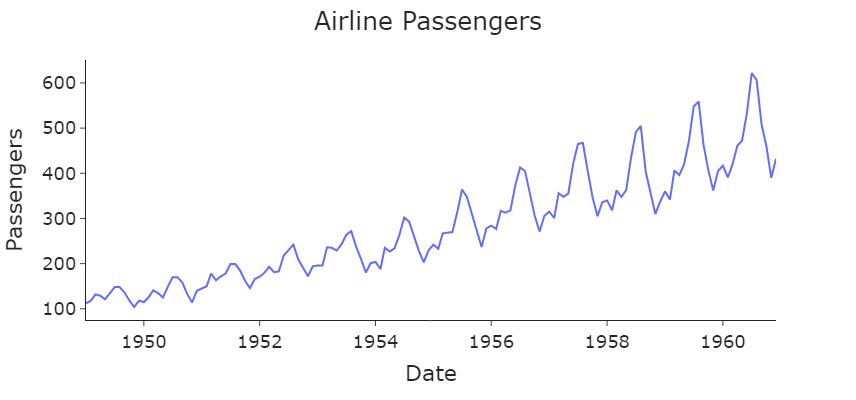

In [5]:
# Plot the airline passenger data
plotting(
    title="Airline Passengers",
    data=data,
    x="Month",
    y="#Passengers",
    x_label="Date",
    y_label="Passengers",
)

In [6]:
# Take the difference and plot it
data["Passenger_Diff"] = data["#Passengers"].diff()

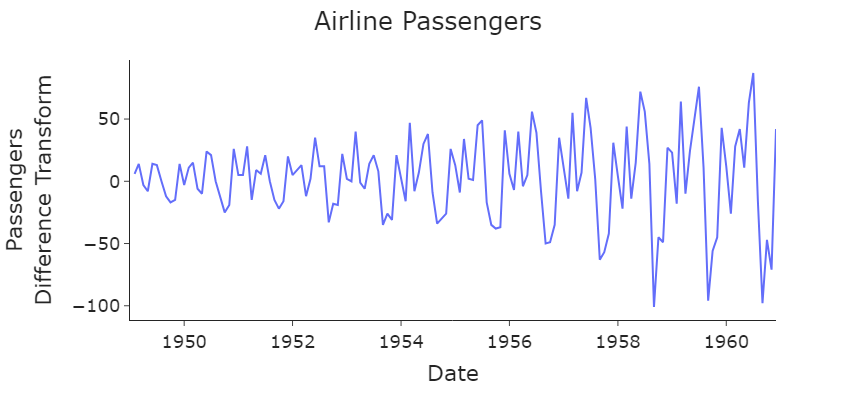

In [7]:
plotting(
    title="Airline Passengers",
    data=data,
    x="Month",
    y="Passenger_Diff",
    x_label="Date",
    y_label="Passengers<br>Difference Transform",
)

In [8]:
# Take the log and plot it
data["Passenger_Log"] = np.log(data["#Passengers"])

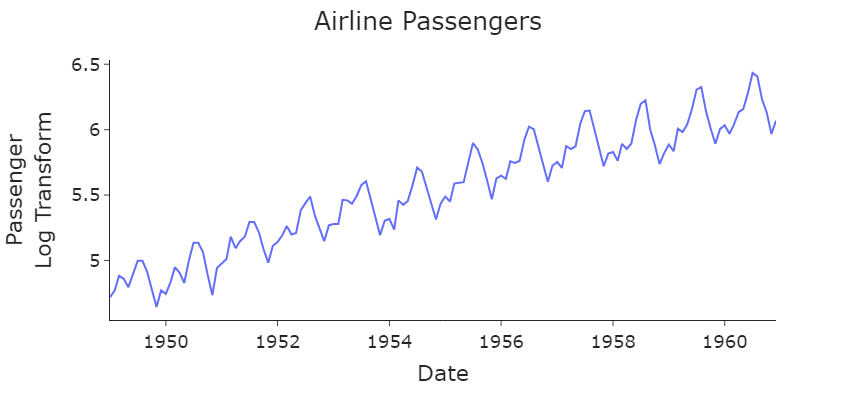

In [9]:
plotting(
    title="Airline Passengers",
    data=data,
    x="Month",
    y="Passenger_Log",
    x_label="Date",
    y_label="Passenger<br>Log Transform",
)

In [10]:
# Take the difference and log and plot it
data["Passenger_Diff_Log"] = data["Passenger_Log"].diff()

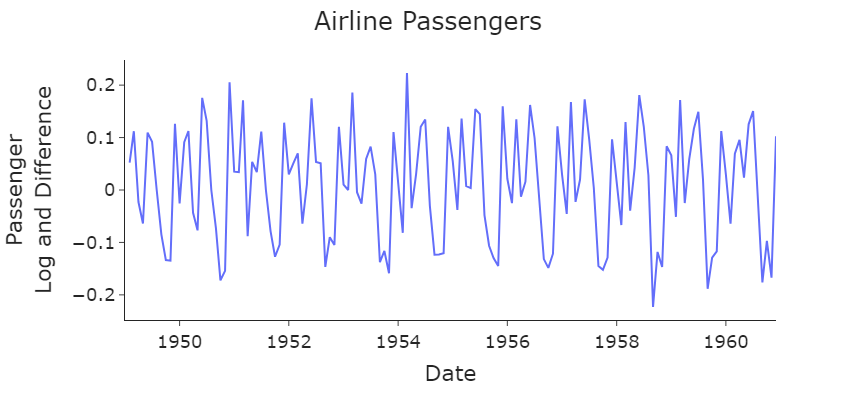

In [11]:
plotting(
    title="Airline Passengers",
    data=data,
    x="Month",
    y="Passenger_Diff_Log",
    x_label="Date",
    y_label="Passenger<br>Log and Difference",
)

In [12]:
def adf_test(series):
    """Using an ADF test to determine if a series is stationary"""
    test_results = adfuller(series)
    print("ADF Statistic: ", test_results[0])
    print("P-Value: ", test_results[1])
    print("Critical Values:")
    for thres, adf_stat in test_results[4].items():
        print("\t%s: %.2f" % (thres, adf_stat))

In [13]:
adf_test(data["Passenger_Diff_Log"][1:])

ADF Statistic:  -2.7171305983881475
P-Value:  0.07112054815085629
Critical Values:
	1%: -3.48
	5%: -2.88
	10%: -2.58


In [14]:
# Apply box-cox transform and plot it
data["Passengers_box_cox"], lam = boxcox(data["#Passengers"])

In [15]:
lam

0.1480226111222821

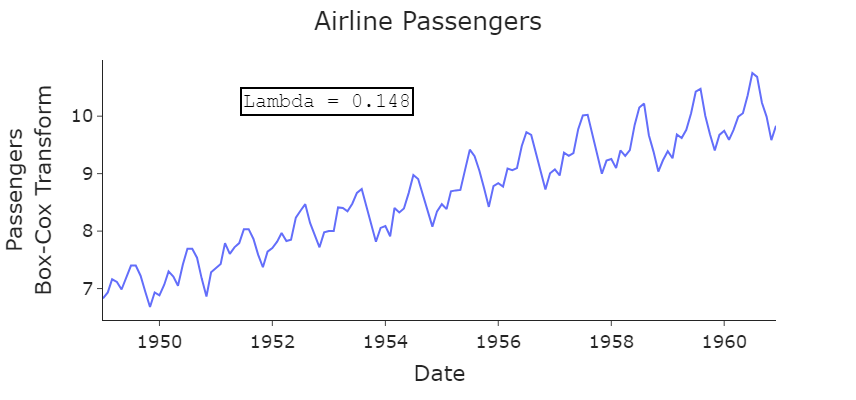

In [16]:
plotting(
    title="Airline Passengers",
    data=data,
    x="Month",
    y="Passengers_box_cox",
    x_label="Date",
    y_label="Passengers<br>Box-Cox Transform",
    text=True,
    lam=lam,
)

In [17]:
# Take the seasonal difference and plot it
data["Passenger_Season_Diff"] = data["#Passengers"].diff(periods=12)

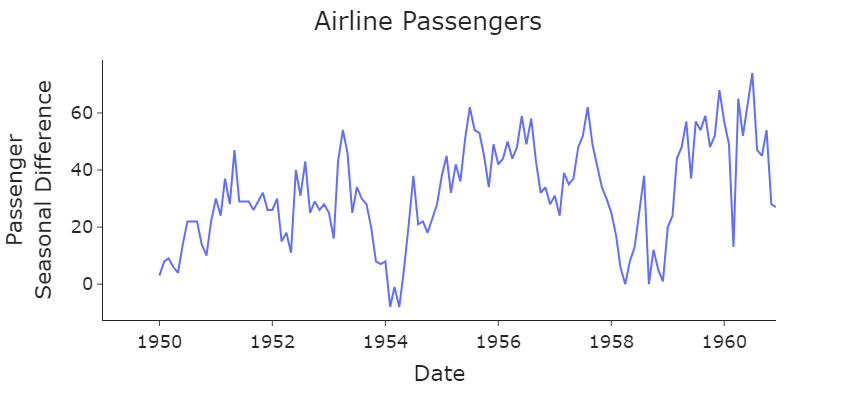

In [18]:
plotting(
    title="Airline Passengers",
    data=data,
    x="Month",
    y="Passenger_Season_Diff",
    x_label="Date",
    y_label="Passenger<br>Seasonal Difference",
)

In [19]:
def adf_test(series):
    """Using an ADF test to determine if a series is stationary"""
    test_results = adfuller(series)
    print("ADF Statistic: ", test_results[0])
    print("P-Value: ", test_results[1])
    print("Critical Values:")
    for thres, adf_stat in test_results[4].items():
        print("\t%s: %.2f" % (thres, adf_stat))

In [20]:
adf_test(data["Passenger_Season_Diff"][12:])

ADF Statistic:  -3.383020726492481
P-Value:  0.011551493085514952
Critical Values:
	1%: -3.48
	5%: -2.88
	10%: -2.58


In [21]:
# Read in the data
data = pd.read_csv("../coal-price-data/AirPassengers.csv", index_col=0)
data.index = pd.to_datetime(data.index)

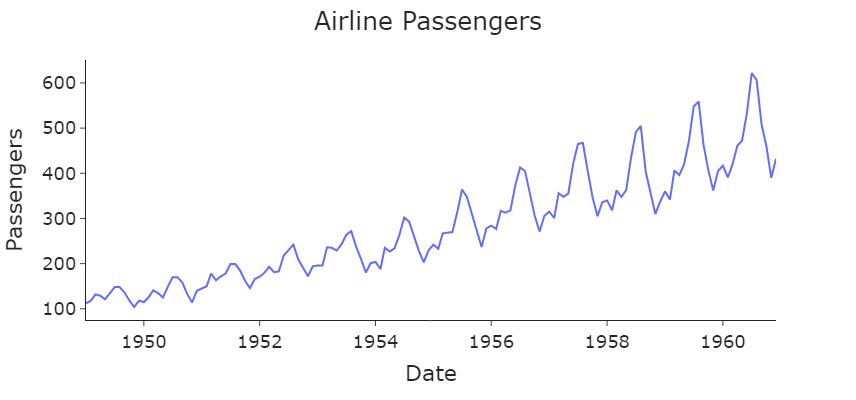

In [22]:
# Plot the data
fig = px.line(
    data,
    x=data.index,
    y="#Passengers",
    labels=({"#Passengers": "Passengers", "Month": "Date"}),
)

fig.update_layout(
    template="simple_white",
    font=dict(size=18),
    title_text="Airline Passengers",
    width=650,
    title_x=0.5,
    height=400,
)

fig.show()

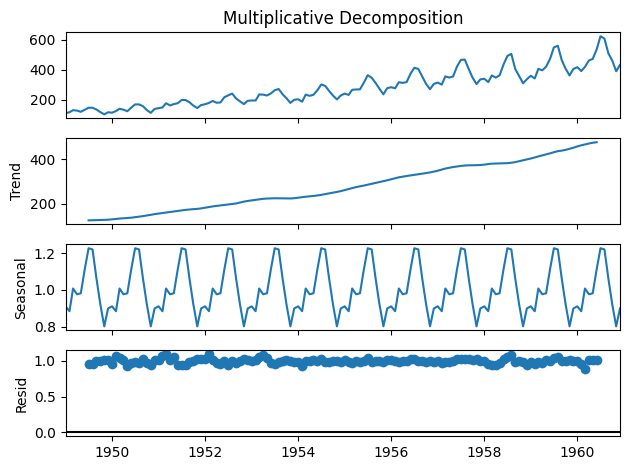

In [23]:
# Plot the decomposition for multiplicative series
data.rename(
    columns={"#Passengers": "Multiplicative Decomposition"}, inplace=True
)
decomposition_plot_multi = seasonal_decompose(
    data["Multiplicative Decomposition"], model="multiplicative"
)
decomposition_plot_multi.plot()
plt.show()

In [24]:
# Read in the data
data = pd.read_csv("../coal-price-data/AirPassengers.csv", index_col=0)
data.index = pd.to_datetime(data.index)

In [25]:
# Apply boxcox to acquire additive model
data["Additive Decomposition"], lam = boxcox(data["#Passengers"])

In [26]:
lam

0.1480226111222821

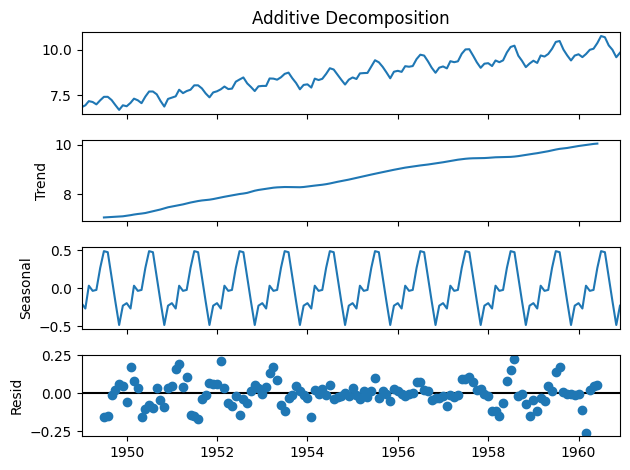

In [27]:
# Plot the decomposition for additive series
decomposition_plot_add = seasonal_decompose(
    data["Additive Decomposition"], model="additive"
)
decomposition_plot_add.plot()
plt.show()